#### ¡Hola! 👋  

Este es un proyecto especial, por primera vez escribire en español. Creo en que (equivocadamente) le di la espalda al español bajo una falsa premisa. Ahora se que puedo contribuir  al ecosistema hispano más de lo que podria en el anglosajon.

Empezare publicando un analisis donde detallare cada uno de mis pasos. Lo hare con datos que tome del canal [A2 Capacitación: Excel](https://www.youtube.com/channel/UCSW-_m4KXiok4Hq2nK97atw) y el cual les recomiendo seguir si quieren aprender Excel.

Dejando de lado lo anterior, hace tiempo escribi un articulo (esta incompleto) sobre [mi proceso para analizar datos](https://joseluistello.github.io/r/2021/07/12/data-analysis-process.html), la idea detras de este approach es abordar el analisis a traves de diferentes etapas. Estas etapas buscan estandarizar la manera en que analizo cualquier tipo de dato.

El outcome de mi proceso consiste en priorizar la legibilidad de mi analisis abordando cada etapa de forma separada (más no aislada).

Al final del día, lo que busco es entender la relacion entre mis variables y encontrar un path entre las observaciones dentro de mis datos. 


Empecemos por cargar nuestras librerias y datos <3

In [1]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(
    'data/Datos.csv',
    dtype={
        "Orden": int,
        "Medio" : str,
        "Vendedor" : str,
        "Plataforma" : str,
        "Tipo_Orden" : str,
        "Tipo_Cliente" : str,
        "Categoría" : str,
        "Producto" : str,
        "Precio" : int,
    },
)

La razón del porque esribi el upload del archivo de esta manera se debe a que es más facil editar el tipo de dato antes de, que despues de.

Este es un ejemplo de como tendriamos que modificar cada tipo de dato.

- df["Precio"] = pd.to_numeric(df["Precio"])



Ahora es tiempo de dos cosas:

1. Colocar un limite al maximo de filas que se muestran en cada return
2. Establecer un default para el tamaño de las graficas 

Les sugiero que utilicen este default. Es comodo establecer limites en el display de filas así como aumentar el tamaño de los plots.

In [3]:
pd.set_option("display.max_rows", 12)

%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 10)

### ¡Tiempo de entender nuestros datos! 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63221 entries, 0 to 63220
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Orden         63221 non-null  int32 
 1   Fecha         63221 non-null  object
 2   Medio         63221 non-null  object
 3   Vendedor      63221 non-null  object
 4   Plataforma    63221 non-null  object
 5   Comision      63221 non-null  object
 6   Tipo_Orden    63221 non-null  object
 7   Tipo_Cliente  63221 non-null  object
 8   Sexo          63221 non-null  object
 9   Categoría     63221 non-null  object
 10  Producto      63221 non-null  object
 11  Precio        63221 non-null  int32 
dtypes: int32(2), object(10)
memory usage: 5.3+ MB


🇫🇷  **Le Magnifique** 🇫🇷 

Tenemos variables interesantes pero primero debemos entender a que nos enfrentamos. El hecho de hacer preguntas como:
* ¿Son cualitativas o cuantitativas? 
* ¿Son continuas o categorias? 
Nos ayuda a tener una idea de como abordar un analisis. Empecemos por explicar la ciasificación de las variables.

- Los datos categoricos responden a preguntas como "qué", "quienes", o "donde", y se clasifican en tres grupos:
    - Datos nominales 
        - No tienen un orden (Paises)
    - Datos ordinales 
        - Tienen un orden (Grado de quemadura)
    - Datos binarios (dicotomicos) 
        - Solo tienen dos niveles (Genero)

- Los datos cuantitativos responden a preguntas como "cuántos", "cuánto" o con "qué" frecuencia, y se clasifican en dos grupos:
    - Datos discretos - No tienen decimales
        - Se pueden clasificar
        - Pueden ser ordinales (1ra, 2da, 3ra clase)
        - Pueden ser binarios (Vivo o muerto 1/0)
        - Pueden ser intervalios o ratios (Temperaturas)
    - Datos continuos - Tienen decimales
        - Lo mismo de arriba


Ahora que damos más claro esta parte, es hora de clasificar nuestro dataset.

In [5]:
df.head()

Orden       Fecha   Medio           Vendedor Plataforma Comision  \
0      1  06/08/2017  Propio  Directo en Tienda    Website       0%   
1      1  06/08/2017  Propio  Directo en Tienda    Website       0%   
2      1  06/08/2017  Propio  Directo en Tienda    Website       0%   
3      1  06/08/2017  Propio  Directo en Tienda    Website       0%   
4      1  06/08/2017  Propio  Directo en Tienda    Website       0%   

  Tipo_Orden Tipo_Cliente     Sexo              Categoría  \
0     Compra     Repetido   Hombre             Pantalones   
1     Compra     Repetido   Hombre  Sudaderas y chamarras   
2     Compra     Repetido  Mujeres               Leggings   
3     Compra     Repetido  Mujeres          Bra deportivo   
4     Compra     Repetido   Hombre              Camisetas   

                          Producto  Precio  
0  Pants de Entrenamiento Reactivo      40  
1            Sudadera sin Costuras      50  
2                   Leggings Ombre      36  
3           Bra Vital sin costuras      40  
4                 Camiseta Heather      50

- Datos Categoricos
     - Medio
     - Vendedor
     - Plataforma
     - Tipo_Orden
     - Tipo_Cliente
     - Sexo
     - Categoia
     - Producto
- Datos Continuos
     - Fecha
     - Comision
     - Precio
     
¿En que tipo de subgrupo crees que entren? Te lo dejo de tarea 😂 

Una de las cosas que me gusta hacer antes de buscar patrones es aislar variables. 
Este aislamiento me permite generar pistas acerca del dataset. Puedo ver el peso de cada variable, su distribución, sus rangos, las desviaciones que tiene, etc.  

In [29]:
(
df["Sexo"]
    .value_counts()
)

Mujeres    35937
Hombre     27284
Name: Sexo, dtype: int64

In [7]:
(
df["Sexo"]
    .value_counts(normalize=True)
    .mul(100)
    .round(1)
    .astype(str) + '%'
)

Mujeres    56.8%
Hombre     43.2%
Name: Sexo, dtype: object

Ahora se que existe una mayoría de mujeres dentro de mi set, lo cual me da señales que planeo ir guardando. Pensemoslo de esta manera:
Ir directo a enteder la relacion entre plataformas/ventas/sexo puede salir mal, existe la posibilidad de sesgar mis pensamientos en torno a un resultado. 
Puedo concluir en que se debe invertir dinero en tal plataforma porque esto atraera 'X' clientes hombres. Cuando tal vez, existan mejores lugares para poner el dinero. 

Por cierto, escribo el codigo en vertical debido a que quiero hacer legible mi analisis para su reproducción, al mismo tiempo que emulo los pipelines de R.

Bueno, sigamos marchando!

In [30]:
(
df["Plataforma"]
    .value_counts(normalize=True)
    .mul(100)
    .round(1)
    .astype(str)+ '%'
)

Instagram    53.6%
Youtube      17.5%
Facebook     15.4%
Website      13.5%
Name: Plataforma, dtype: object

Lo que nos arroja este resultado es el total de observaciones que presento cada plataforma. Esto quiere decir (hasta ahora) que Instagram es la que más unidades vende, pero eso no significa que sea la que más revenue genere.

In [31]:
(
df["Vendedor"]
    .value_counts()
    .nlargest(12)
)

Publicidad Insta      12673
Directo en Tienda      8532
Publicidad Face        5938
Publicidad Youtube     5007
karlagvzcia            2860
marianaguayoela        2322
jimellanna             1177
aplinewithvyycan       1138
greciasotelovvv        1097
dudabrnrons            1079
abrahamojicar          1068
marugshbolena          1040
Name: Vendedor, dtype: int64

In [10]:
(
df["Tipo_Cliente"]
    .value_counts()
)

Repetido    32561
Nuevo       30660
Name: Tipo_Cliente, dtype: int64

In [11]:
(
df["Tipo_Orden"]
    .value_counts(normalize=True)
    .mul(100)
    .round(1)
    .astype(str)+ '%'
)

Compra        91.0%
Devolucion     9.0%
Name: Tipo_Orden, dtype: object

In [12]:
(
df["Comision"]
    .value_counts()
)

0%     32150
30%    12807
20%     6702
10%     5872
40%     5690
Name: Comision, dtype: int64

In [13]:
(
df["Medio"]
    .value_counts(normalize=True)
    .mul(100)
    .round(1)
    .astype(str)+ '%'
)

Propio        50.9%
Influencer    49.1%
Name: Medio, dtype: object

Bueno, ya se puso interesante la cosa. Hasta ahora hemos aprendido varias cosillas.
1. El volumen de ventas es dominado por Instagram
2. Hay una mayoria de mujeres
3. Hay muchos vendedores, 44 para ser exactos
4. Tienen "buena" retencion y lo digo entre comillas ya que bien puede desplozarme su retencion despues de que un repetido compro, o sea que no hubo una tercera vez.
5. Hubo pocas devoluciones comparado a sus compras
6. Y existen 5 tipos de comisiones donde la mayoria se concentra entre el 0% y 30%


In [14]:
( 
df["Precio"]
    .describe()
    .round(1)
)

count    63221.0
mean        40.7
std         13.6
min         10.0
25%         34.0
50%         40.0
75%         50.0
max        100.0
Name: Precio, dtype: float64

Text(0, 0.5, 'Volumen de productos')

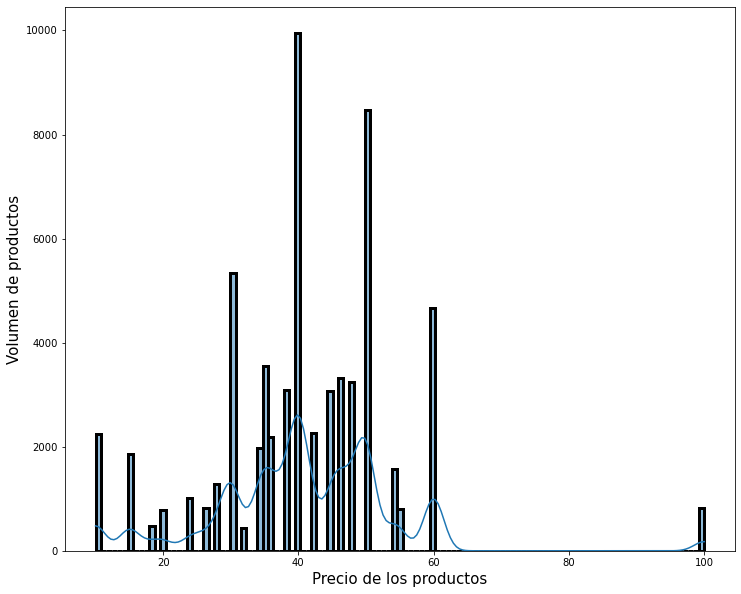

In [15]:
PrecioDist = sns.histplot(
    df, 
    x="Precio",
    linewidth=3, 
    kde = True)
PrecioDist.set_xlabel("Precio de los productos", fontsize = 15)
PrecioDist.set_ylabel("Volumen de productos", fontsize = 15)

Interesante... Esto nos dice dos cosas:

- La primera es que el precio de los productos de la tienda se encuentran entre el rango de 10 y 100 pesos.
- Y la segunda es que la mayoria de los productos se encuentra entre un precio de 20 y 50 pesos.

Creo que es tiempo de parar el aislamento de variables. Tengo  preguntas y es tiempo de buscar la respuesta a través  de esas relaciones entre variables. 
Pequeñines, de verdad que no quiero hacer visualizaciones. Uno puede llegar muy lejos agrupando y contando pero les dare un poco de ese gusto.

He llegado al punto donde es necesario contar con un plan de ataque pues de lo contrario terminare perdiendome. Tengo muchas preguntas, desde saber donde se concentran las comisiones y porque, hasta entender de donde viene realmente el crecimiento.

Pensemoslo un poco, si las comisiones del 40% se concentran en un rango de precio elevado (100) , tendriamos un dropeo del revenue del 40 $ al 60 $ restante todavia hay que agregarle mas costos fijos y variables. 
La empresa puede estar perdiendo dinero sin siquiera notarlo. 

Lo se, son premisas que no puedo sostener. Estoy atado de las manos dentro de este limitado paradigma, esquema y modelo de datos, pero dentro del gran todo, lo que comento podria ser cierto. 

##### Es tiempo de entender las relaciones entre nuestas variables. 

Como lo dije al principio, la idea es buscar una relacion (y como no termine de decirlo), encontrar cosas interesantes, necesarias y que tengan un impacto.

Y eso es justamente lo que hace que el analisis sea algo hermoso. Veras, así como los modelos estadisticos pueden tener un motivo explicativo o predictivo, el analisis también puede tener sus motivos. 

- Tal vez queramos visualizar algo generico como un dashboard de ventas con limites dentro de un determinado periodo de tiempo lo que nos llevaria a describir la situación de la empresa.
- O tal vez queremos entender como crece una empresa a través de todos los canales que tienen la empresa lo que nos llevaria a explorar la situación de la empresa.

Y no, no necesitamos una regresion para entender estas relaciones.  

Si no fui muy claro, dejame que te lo explique de esta manera. En este punto debemos comenzar a preguntarnos que es lo que queremos lograr y como una variable depende o se relaciona con la otra, y el como podemos sacar el maximo provecho de eso.

**(Inserta imagen)[]**

Para este caso, mi objetivo es explorar. Tal vez, mi primer paso pueda ser el entender que canales son los mas beneficiosos para la empresa o saber que productos se venden mas. 
Inclusive puedo mezclar los dos objetivos anteriores y hacer un nuevo objetivo que busque entender cuales son los canales que mas venden y que productos son los que mas venden. 

Vamos a empezar por aislar nuestras variables y despues empezamos a conectarlas.

Echemosle un 👁️ a nuesra variable de Sexo.

Text(0, 0.5, 'Numero de unidades vendidas')

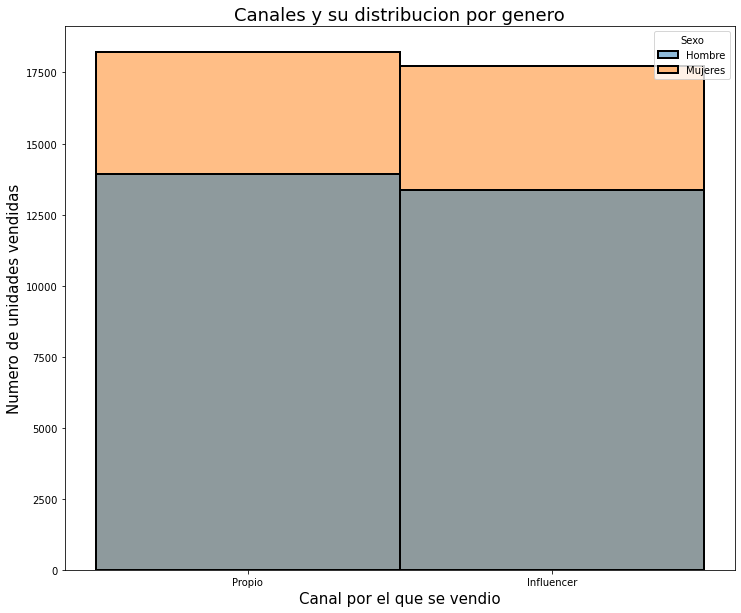

In [16]:
bx = sns.histplot(df,
                  x="Medio",
                  hue='Sexo',
                  linewidth=2)
bx.set_title("Canales y su distribucion por genero", fontsize=18)
bx.set_xlabel("Canal por el que se vendio", fontsize = 15)
bx.set_ylabel("Numero de unidades vendidas", fontsize = 15)

Text(0, 0.5, 'Numero de ventas')

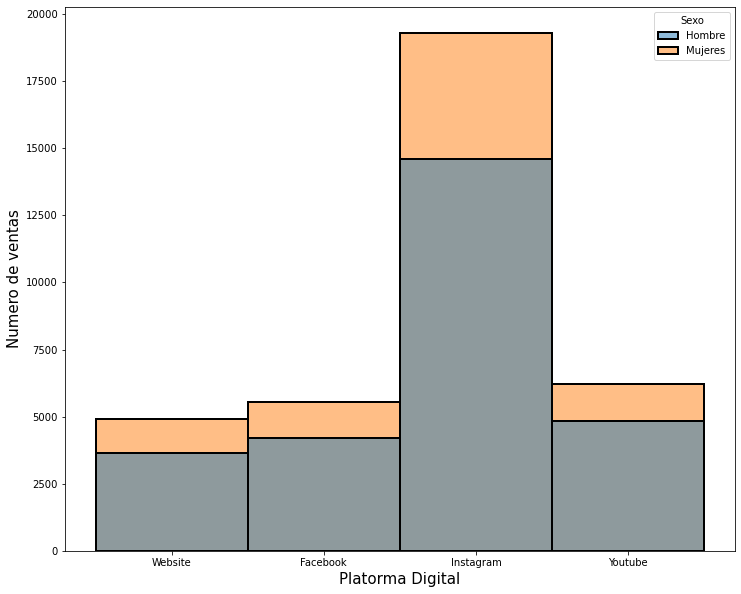

In [17]:
d = sns.histplot(
    df, 
    x="Plataforma",
    hue="Sexo",
    linewidth=2)
d.set_xlabel("Platorma Digital", fontsize = 15)
d.set_ylabel("Numero de ventas", fontsize = 15)

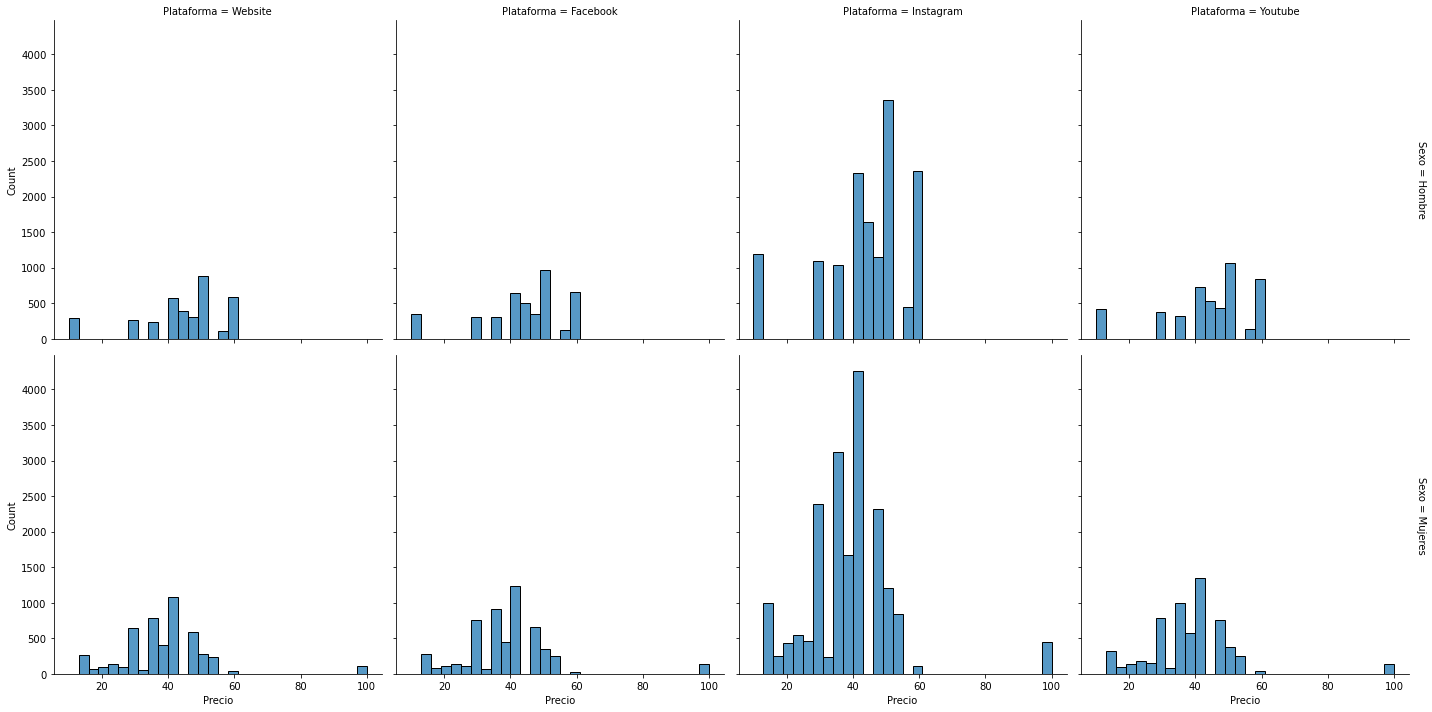

In [18]:
sns.displot(df, 
            x="Precio", 
            col="Plataforma", 
            row="Sexo", 
            binwidth=3, 
            height=5, 
            facet_kws=dict(margin_titles=True))

Ya estamos obteniendo insights.

1. Hay casi 7,000 mujeres mas que hombres dentro de la plataforma.
2. Se vende un poco más por canales propios y los generos siguen esa tendencia. 
3. Las plataformas que más predomina es Instagram, seguido de Youtube, Facebook y el Website del comercio.
4. Las mujeres se mantienen a la cabeza dentro de los 4 canales. 
5. En el ultimo histograma podemos observar distintas cosas.
    - 4.1 Las mujeres compran más articulos que los hombres dentro de cualquier plataforma
    - 4.2 Las mujeres compran articulos del maximo rango en cualquier plataforma.
    - 4.3 La plataforma que más productos de alto valor vende es Instagram.

Podemos englobar el conocimiento que tenemos sobre el data set hasta ahora:
1. Sabemos como se distribuye el precio de los productos y donde se concentra la mayor parte de los productos
2. Sabemos la disparidad del genero
3. Sabemos que canal y plataformas son las que mas venden productos
4. Donde se compran los articulos de alto valor y que genero los compra


#### Es tiempo de seguir avanzando en nuestro analisis

In [19]:
(
df
 .groupby('Sexo')['Precio']
 .sum().reset_index()
 .sort_values('Precio', ascending=False)
)

Sexo   Precio
1  Mujeres  1380627
0   Hombre  1191223

In [20]:
(df
 .groupby(['Plataforma', 'Sexo'])
 ['Precio']
 .sum()
 .reset_index()
 .sort_values('Precio', ascending=False)
)

Plataforma     Sexo  Precio
3  Instagram  Mujeres  741824
2  Instagram   Hombre  637018
7    Youtube  Mujeres  237670
1   Facebook  Mujeres  213132
6    Youtube   Hombre  211950
5    Website  Mujeres  188001
0   Facebook   Hombre  182941
4    Website   Hombre  159314

In [21]:
df.groupby('Sexo')['Precio'].sum().reset_index().sort_values('Precio', ascending=False)

Sexo   Precio
1  Mujeres  1380627
0   Hombre  1191223

In [22]:
df.groupby(['Sexo', 'Plataforma'])['Precio'].sum().reset_index().sort_values('Precio', ascending=False)

Sexo Plataforma  Precio
5  Mujeres  Instagram  741824
1   Hombre  Instagram  637018
7  Mujeres    Youtube  237670
4  Mujeres   Facebook  213132
3   Hombre    Youtube  211950
6  Mujeres    Website  188001
0   Hombre   Facebook  182941
2   Hombre    Website  159314

In [23]:
df["Tipo_Orden"].value_counts()

Compra        57540
Devolucion     5681
Name: Tipo_Orden, dtype: int64

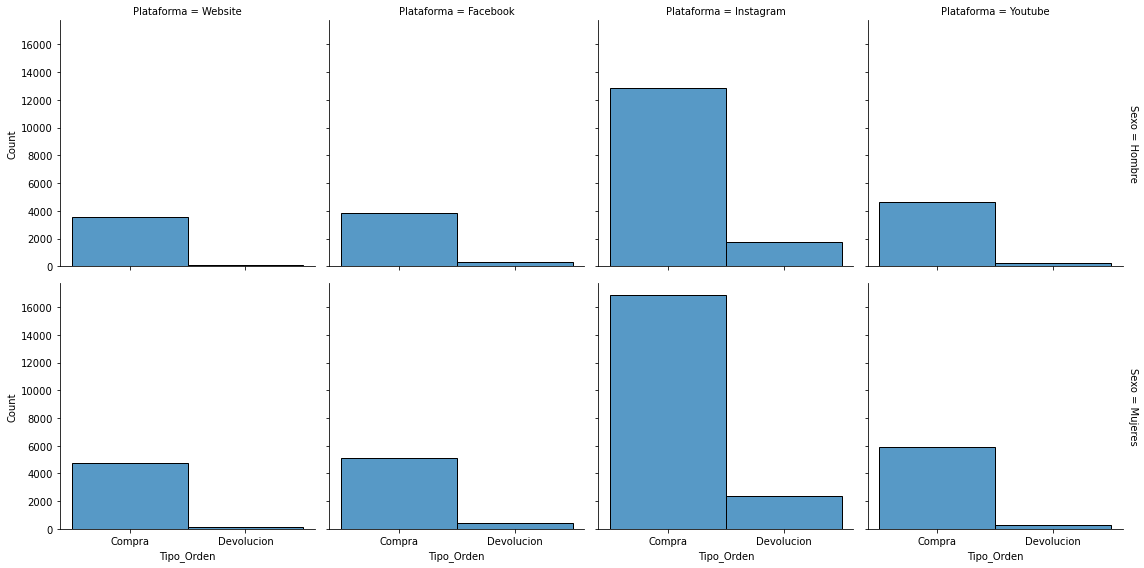

In [24]:
sns.displot(df, 
            x="Tipo_Orden", 
            col="Plataforma", 
            row="Sexo", 
            binwidth=3, 
            height=4, 
            facet_kws=dict(margin_titles=True))

In [25]:
df["Tipo_Cliente"].value_counts()

Repetido    32561
Nuevo       30660
Name: Tipo_Cliente, dtype: int64

In [26]:
df["Producto"].value_counts()

Leggings Flex             1832
Tanga sin costuras        1285
Sudadera Degree           1187
Leggings Ombre            1182
Sudadera Cross back       1181
                          ... 
Top Fit sin costuras       106
Sudadera Fitness           104
Camiseta Fitness           102
Unitardo Deportivo 7/8     102
Solace Sweater              83
Name: Producto, Length: 101, dtype: int64

In [27]:
df["Categoría"].value_counts()

Pantalones               8067
Leggings                 7772
Chamarras y Sudaderas    7445
Interior                 7233
Sudaderas y chamarras    7010
Camisetas y Tops         6412
Bra deportivo            5885
Camisetas                4374
Shorts                   3656
Ropa Interior            3127
Calcetines               2240
Name: Categoría, dtype: int64

In [28]:
df["Comision"].value_counts()

0%     32150
30%    12807
20%     6702
10%     5872
40%     5690
Name: Comision, dtype: int64